# Generating Example Regression Data

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
# We want 100 samples, and we need two fixed beta values
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
# x is a uniform distribution of numbers between 1 and 10
x = 10 * ss.uniform.rvs(size=n)
# y is a regression model (intercept + coefficent * x), with additional random noise
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale=1, size=n)

Text(0, 0.5, 'y')

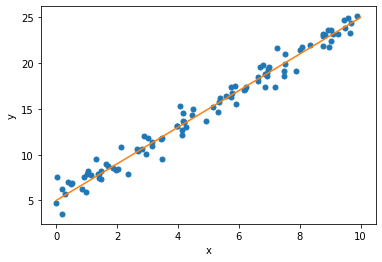

In [3]:
# We then plot x and y
plt.figure()
plt.plot(x,y,"o",ms=5)
# These are the values for which we want to plot the regression function
# in other words, these values are just a linear row of points from 0 to 10 to compare the points with noise to
xx = np.array([0,10])
plt.plot(xx,beta_0 + beta_1 * xx)
plt.xlabel("x")
plt.ylabel("y")

# Least Squares Estimation in Code

In [8]:
# We first create an empty list for the sums of squares, and a list of estimated slopes
rss = []
slopes = np.arange(-10,15,0.01)
# We deduct beta_0 and the slope estimates from y, then sum their squares
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))
# then we check which of these resulted in the lowest sum of squares
ind_min = np.argmin(rss)
print("Estimate for the slope with lowest R^2: ",slopes[ind_min])

Estimate for the slope with lowest R^2:  1.9999999999997442


Text(0, 0.5, 'RSS')

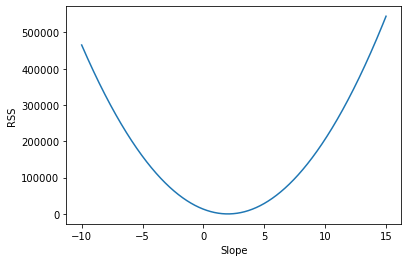

In [9]:
# Plot figure to show these
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS")

# Simple Linear Regression in Code

In [11]:
import statsmodels.api as sm
# we then create an ordinary least squares model, but this one has no intercept
mod = sm.OLS(y,x)
# then we fit it
est = mod.fit()
# then we print a summary of it
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):                    1.14e-75
Time:                        14:07:14   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
import statsmodels.api as sm
# we then create an ordinary least squares model, and this time we add a constant first
X = sm.add_constant(x)
mod = sm.OLS(y,X)
# then we fit it
est = mod.fit()
# then we print a summary of it
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           7.47e-82
Time:                        14:27:08   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

# SciKit-Learn for Regression

In [17]:
# We first set the parameters for the model, this is the n and gradients
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)
# These variables are random uniform variables from 1 to 10
x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
# 
y = beta_0 + (beta_1 * x_1) + (beta_2 * x_2) + ss.norm.rvs(loc = 0, scale = 1, size = n)
# 
X = np.stack([x_1,x_2], axis=1)

<IPython.core.display.Javascript object>


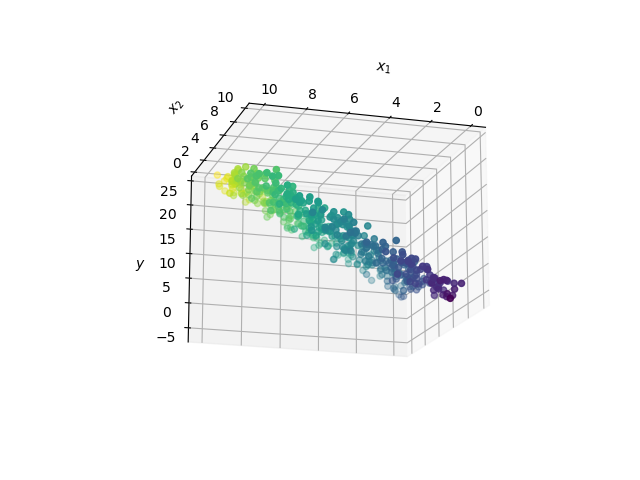

Text(0.5, 0, '$y$')

In [19]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],y,c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")

In [26]:
# We will now try to fit this model. 
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X,y)
# These print the coefficients of the factors
print("The intercept (beta_0) is: ",lm.intercept_)
print("The beta_1 gradient is: ",lm.coef_[0])
print("The beta_2 gradient is: ",lm.coef_[1])
# We can also predict the value of Y for a given specific value of x.
# To do this, we first create an array, which has values for all predictors (in this case 2)
# This will give us a warning, unless we reshape
X_0 = np.array([2,4])
print(lm.predict(X_0.reshape(1,-1)))
# We can also predict the R-squared values for any given predictions
lm.score(X,y)

The intercept (beta_0) is:  5.154077763777245
The beta_1 gradient is:  1.9999378989891412
The beta_2 gradient is:  -1.0202644869933355
[5.07289561]


0.9798997316600129

# Assessing Model Performance

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
# We first have to create 4 variables which are going to capture the output of the function
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)
# We then create a LinearRegression model with a fitted intercept
lm = LinearRegression(fit_intercept=True)
# Then, we fit the predictors and outcomes from the split data to the model
lm.fit(X_train, y_train)
# Then, we test how well the model performs by looking at the R^2
lm.score(X_test,y_test)

0.9794930834681773